Import

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Global Variable

In [7]:
TITLE = 'Confronto tra la posizione di partenza e la posizione di arrivo'
XTICKS = ['Arrivo', 'Partenza']

In [8]:
def convertData(data, name, num):
    posd = 'POS D'+ num
    std = 'ST D' + num
    no_dnf = data[posd].dropna().values
    pos = [no_dnf, data[std]]
    drawChart(pos, name)

In [9]:
def drawChart(pos, name):
    fig, ax = plt.subplots()
    ax.boxplot(pos, True, meanline = True, showmeans = True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.set_xlabel(name)
    plt.xticks([1, 2], XTICKS)
    ax.yaxis.set_major_locator(ticker.MultipleLocator(base=1))
    plt.title(TITLE)
    plt.show()

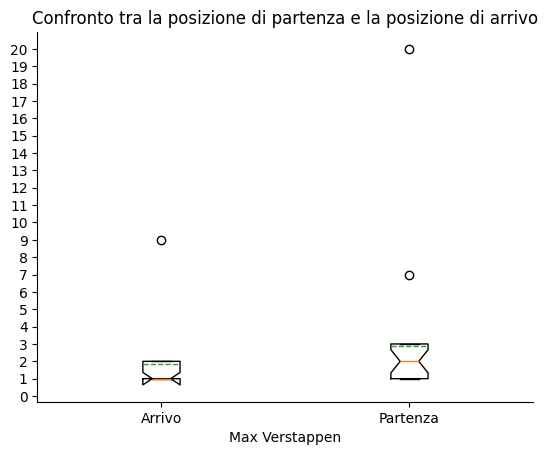

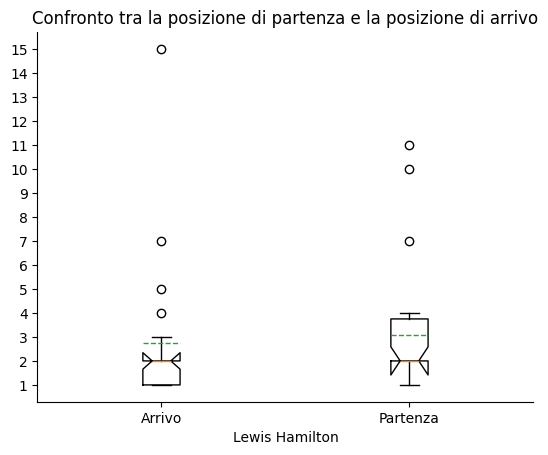

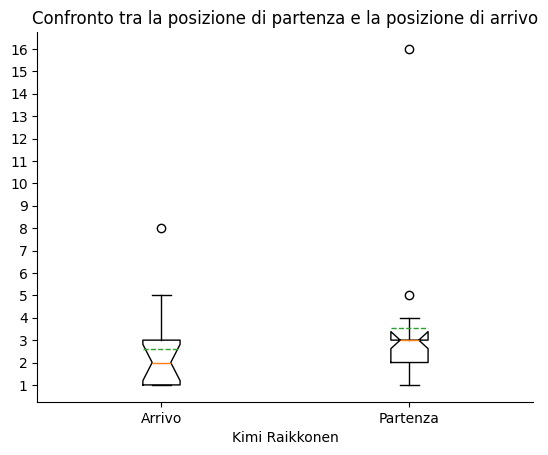

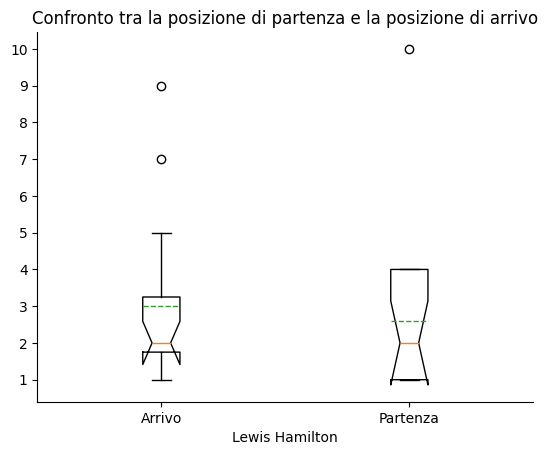

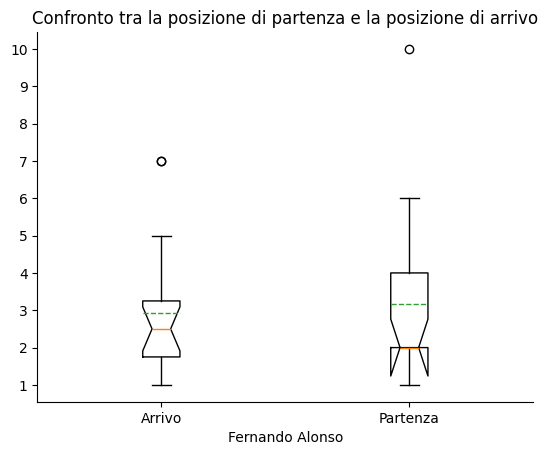

In [10]:
data = pd.read_csv('data/2021results.csv')
convertData(data, 'Max Verstappen', '1')
convertData(data, 'Lewis Hamilton', '2')

In [ ]:
data = pd.read_csv('data/2007results.csv')
convertData(data, 'Kimi Raikkonen', '1')
convertData(data, 'Lewis Hamilton', '2')
convertData(data, 'Fernando Alonso', '3')